In [2]:
#importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:/Users/ASUS_AMZAD/Downloads/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<p>There are no null entries in the dataset. Hence the data is clean for further processing.</p>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
#printing the summary statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<h2>1.Train a Decision Tree Classifier and visualize the tree.</h2>

In [8]:
#define features and target

X = df.drop('target', axis=1)
y = df['target']

In [9]:
X.shape

(1025, 13)

In [10]:
#split the dataset as training and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#shape of the training set

X_train.shape

(820, 13)

In [12]:
#train a decision tree classifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

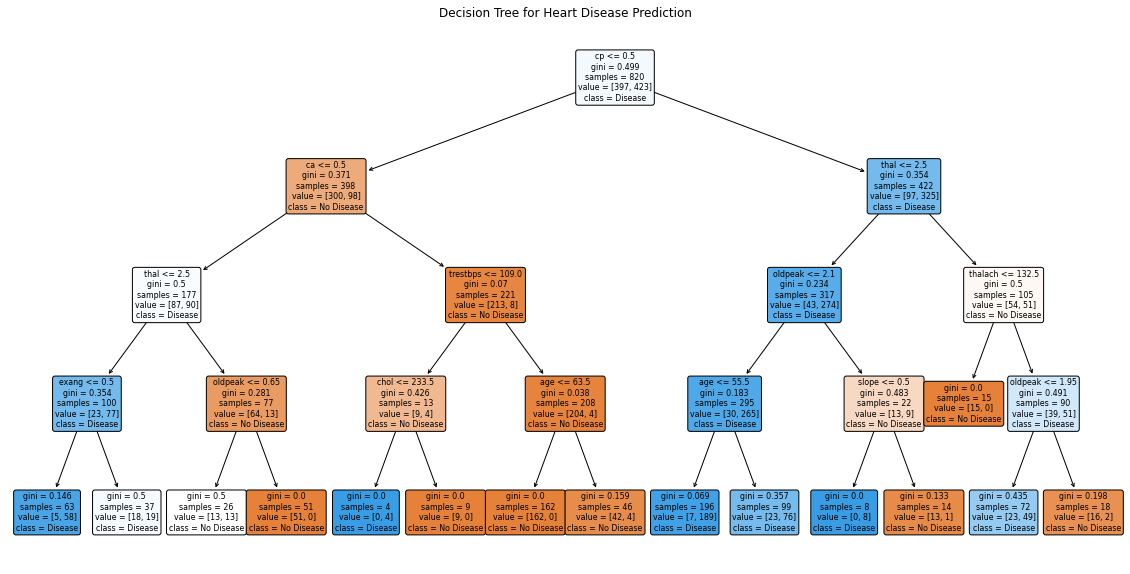

In [13]:
#Visalize the decision tree

plt.figure(figsize=(20,10))
plot_tree(clf, 
          feature_names=X.columns.tolist(),  # Convert Index to list
          class_names=['No Disease', 'Disease'], 
          filled=True, 
          rounded=True)

plt.title('Decision Tree for Heart Disease Prediction')
plt.show()

<h2>2.Analyze overfitting and control tree depth.</h2>

In [14]:
# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Track accuracy for different depths
train_accuracies = []
val_accuracies = []
depths = range(1, 21)

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    val_acc = accuracy_score(y_val, clf.predict(X_val))
    
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)


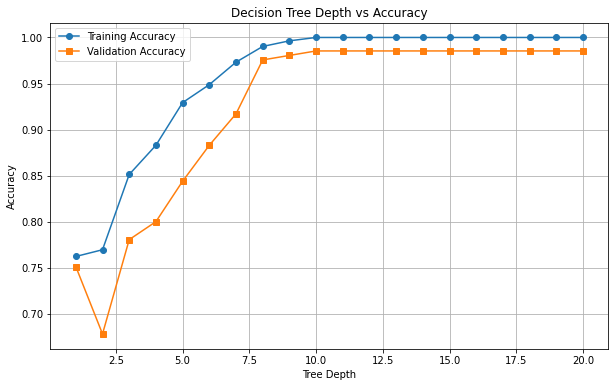

In [15]:
# Plotting the results

plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depths, val_accuracies, label='Validation Accuracy', marker='s')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Depth vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()

<p>- If training accuracy is high but validation accuracy drops as depth increases, the model is overfitting.</p>
<p>- The optimal depth is where validation accuracy peaks before it starts to decline.</P>

<h2> 3.Train a Random Forest and compare accuracy.</h2>

In [16]:
#train a random forest classifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
y_pred = rf_clf.predict(X_train)
y_val_pred = rf_clf.predict(X_val)

In [18]:
#evaluate

rf_train_acc = accuracy_score(y_train,y_pred)
rf_val_acc = accuracy_score(y_val, y_val_pred)

In [19]:
print(f"Random Forest Training Accuracy: {rf_train_acc:.3f}")
print(f"Random Forest Validation Accuracy: {rf_val_acc:.3f}")

Random Forest Training Accuracy: 1.000
Random Forest Validation Accuracy: 0.985


In [20]:
# Re-train Decision Tree with optimal depth (e.g., 4 from previous analysis)
dt_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_clf.fit(X_train, y_train)

dt_train_acc = accuracy_score(y_train, dt_clf.predict(X_train))
dt_val_acc = accuracy_score(y_val, dt_clf.predict(X_val))

print(f"Decision Tree Training Accuracy: {dt_train_acc:.3f}")
print(f"Decision Tree Validation Accuracy: {dt_val_acc:.3f}")

Decision Tree Training Accuracy: 0.883
Decision Tree Validation Accuracy: 0.800


<h2>4.Interpret feature importances.</h2>

In [21]:
#get feature importances from the trained model

importances = rf_clf.feature_importances_
feature_names =X.columns

#create a Dataframe for better readability

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

     Feature  Importance
2         cp    0.135072
11        ca    0.127327
7    thalach    0.122169
9    oldpeak    0.121905
12      thal    0.110518
0        age    0.077908
4       chol    0.074822
3   trestbps    0.071171
8      exang    0.057594
10     slope    0.045782
1        sex    0.028731
6    restecg    0.018557
5        fbs    0.008444


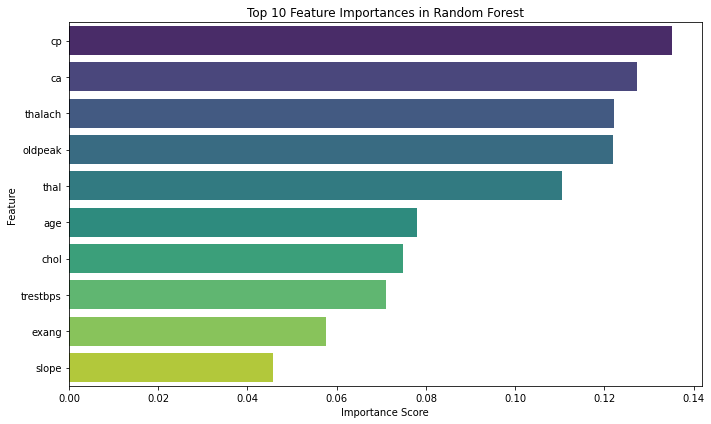

In [22]:
# Plot the top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances in Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

<h2>5.Evaluate using cross-validation.</h2>

In [23]:
#perform 5 fold cross validation random forest

rf_cv_scores = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy' )

print(f"Random Forest Cross-Validation Accuracies: {rf_cv_scores}")
print(f"Mean Accuracy: {rf_cv_scores.mean():.3f}")
print(f"Standard Deviation: {rf_cv_scores.std():.3f}")

Random Forest Cross-Validation Accuracies: [1.         1.         1.         1.         0.98536585]
Mean Accuracy: 0.997
Standard Deviation: 0.006


In [24]:
#perform 5 fold cross validation decision tree

dt_cv_scores = cross_val_score(dt_clf, X, y, cv=5, scoring='accuracy')

print(f"Decision Tree Cross-Validation Accuracies: {dt_cv_scores}")
print(f"Mean Accuracy: {dt_cv_scores.mean():.3f}")
print(f"Standard Deviation: {dt_cv_scores.std():.3f}")

Decision Tree Cross-Validation Accuracies: [0.84390244 0.83414634 0.87317073 0.80487805 0.81463415]
Mean Accuracy: 0.834
Standard Deviation: 0.024


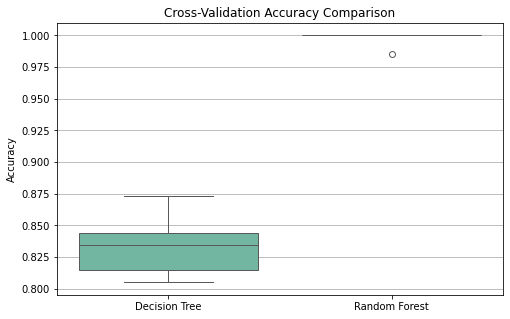

In [25]:
# Boxplot of cross-validation scores
plt.figure(figsize=(8, 5))
sns.boxplot(data=[dt_cv_scores, rf_cv_scores], palette='Set2')
plt.xticks([0, 1], ['Decision Tree', 'Random Forest'])
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy Comparison')
plt.grid(True, axis='y')
plt.show()